#1. Mount Drive

from google.colab import drive
drive.mount('/gdrive')

!ls -al '/gdrive/My Drive/data'

#2. Korean Character

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 전역 폰트 설정
plt.rc('font', family='NanumGothic') 

#3. Load Data

In [3]:
import pandas as pd

In [5]:
# Load a file under "data" folder
# file = "/gdrive/My Drive/data/data_2020.csv"
file = "data/data_2020.csv"
data = pd.read_csv(file)

In [6]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


#4. Bubble Chart, 도착영업소코드

In [8]:
data_destnation_mean = data.groupby(by='도착영업소코드').mean()
data_destination_count = data.groupby(by=['도착영업소코드']).count()

In [9]:
data_destnation_mean

,집계일자,집계시,출발영업소코드,통행시간,요일
도착영업소코드,,,,,
105,2.020067e+07,11.496984,101.0,923.274559,2.922514
110,2.020067e+07,11.412890,101.0,3656.326247,2.794632
115,2.020067e+07,11.812704,101.0,5688.843060,2.945966
120,2.020068e+07,12.673790,101.0,8274.255269,3.111754
125,2.020068e+07,12.568606,101.0,9594.262434,2.926693
130,2.020066e+07,12.982292,101.0,9142.913255,2.949057
135,2.020068e+07,12.619278,101.0,13507.929860,3.054120
140,2.020066e+07,12.076725,101.0,15819.257985,3.014630


In [10]:
data_destination_count

,집계일자,집계시,출발영업소코드,통행시간,요일
도착영업소코드,,,,,
105,49738,49738,49738,49738,49738
110,38526,38526,38526,38526,38526
115,26354,26354,26354,26354,26354
120,6738,6738,6738,6738,6738
125,7339,7339,7339,7339,7339
130,7793,7793,7793,7793,7793
135,7428,7428,7428,7428,7428
140,8954,8954,8954,8954,8954


In [11]:
data_destnation_mean_time = data_destnation_mean['통행시간']
data_destination_count_time = data_destination_count['통행시간']

In [12]:
data_destnation_mean_time

도착영업소코드
105      923.274559
110     3656.326247
115     5688.843060
120     8274.255269
125     9594.262434
130     9142.913255
135    13507.929860
140    15819.257985
Name: 통행시간, dtype: float64

In [13]:
data_destination_count_time

도착영업소코드
105    49738
110    38526
115    26354
120     6738
125     7339
130     7793
135     7428
140     8954
Name: 통행시간, dtype: int64

In [14]:
x = data_destnation_mean_time.index

In [15]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
labels = ['기흥', '목천', '대전', '황간', '남구미', '동김천', '경주', '부산']

In [16]:
values = data_destnation_mean_time.values

In [17]:
counts = data_destination_count_time.values

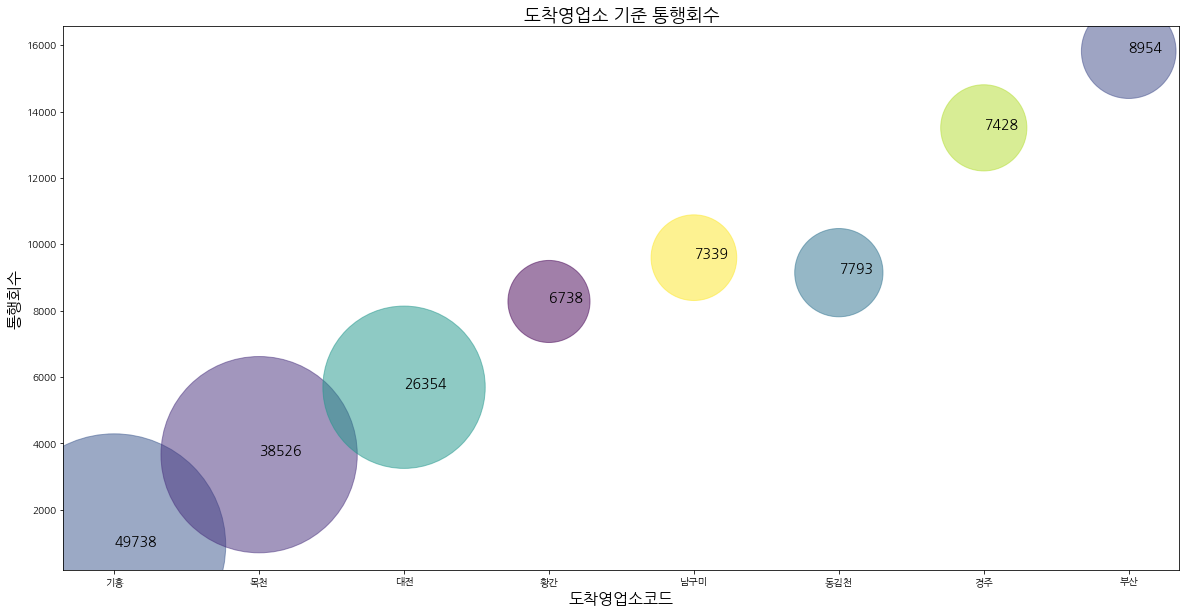

In [18]:
import numpy as np

colors = np.random.rand(len(labels))
# Configure figure size
plt.figure(figsize=(20,10))
# Creae bubble Chart
plt.scatter(labels, values, s=counts, c=colors, alpha=0.5)

for i, txt in enumerate(counts):
    plt.annotate(txt, (labels[i], values[i]), fontsize=14)

# Generate labels and title
plt.title("도착영업소 기준 통행회수",fontsize=18)
plt.xlabel('도착영업소코드', fontdict= {'size':16})
plt.ylabel('통행회수', fontdict= {'size':16})
# Show plot
plt.show()

#5. Geo Chart

In [22]:
#!pip install folium

In [23]:
# Import folium : https://python-visualization.github.io/folium/
import folium

In [24]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
#http://data.ex.co.kr/link/linkList?pn=1&linkId=2
#{"code": 101, "name": "서울", "long": 127.102083, "lat": 37.365071},
locations = [
            {"code": 105, "name": "기흥", "long": 127.102439, "lat": 37.222249},
            {"code": 110, "name": "목천", "long": 127.230613, "lat": 36.768046},
            {"code": 115, "name": "대전", "long": 127.448328, "lat": 36.361320},
            {"code": 120, "name": "황간", "long": 127.901970, "lat": 36.223015},
            {"code": 125, "name": "남구미", "long": 128.371780, "lat": 36.072653},
            {"code": 130, "name": "동김천", "long": 128.175000, "lat": 36.140000},
            {"code": 135, "name": "경주", "long": 129.188771, "lat": 35.809907},
            {"code": 140, "name": "부산", "long": 129.105170, "lat": 35.278705}
        ] 

In [25]:
idx = 1
location = locations[idx]
folium.Map(location=[location['lat'], location['long']])

In [26]:
folium.Map(location=[location['lat'], location['long']],
           tiles='Stamen Toner', # "Stamen Terrain", "cartodbpositron"
           zoom_start=13
    )

In [27]:
map = folium.Map(location=[location['lat'], location['long']],
           tiles='Stamen Terrain', # "Stamen Toner", "cartodbpositron"
           zoom_start=13
    )
popup = str(location['code']) + '. ' + location['name']
folium.Marker([location['lat'], location['long']], 
               popup=popup, tooltip=location['code'],
               icon=folium.Icon(color='red', icon='info-sign')).add_to(map)
map

In [28]:
counts

array([49738, 38526, 26354,  6738,  7339,  7793,  7428,  8954],
      dtype=int64)

In [29]:
counts.max()

49738

In [30]:
max_radius = 50
radius = int(max_radius * counts[idx]/counts.max())
color = 'green'
map = folium.Map(location=[location['lat'], location['long']],
           tiles='cartodbpositron', # "Stamen Toner", "Stamen Terrain"
           zoom_start=8
    )
popup = location['name'] + ' : ' + str(counts[idx])
folium.CircleMarker([location['lat'], location['long']], 
               radius=radius, color=color, fill=True, fill_color=color, popup=popup).add_to(map)
map

In [31]:
max_radius = 50
color = 'green'

def putCircle(idx):
    location = locations[idx]
    radius = int(max_radius * counts[idx]/counts.max())
    popup = location['name'] + str(counts[idx])
    folium.CircleMarker([location['lat'], location['long']], 
            radius=radius, color=color, fill=True, fill_color=color, popup=popup).add_to(map)
            
center = int(len(locations) / 2)
map = folium.Map(location=[locations[center]['lat'], locations[center]['long']],
           tiles='cartodbpositron', # "Stamen Toner", "Stamen Terrain"
           zoom_start=8
    )

for i in range(len(locations)):
    putCircle(i)

map